In [26]:
import matplotlib.pyplot as plt
from torchvision.datasets.mnist import MNIST
from torchvision.transforms import ToTensor     # 이미지 전처리. 이미지 분석을 위한 데이터의 크기를 맞춰주는 작업
from torch.utils.data.dataloader import DataLoader      # 데이터를 불러와서 잘라주는 역할(DataLoader)
import torch
import torch.nn as nn
from torch.optim.adam import Adam

In [6]:
train_data = MNIST(root= './', train= True, download= True, transform= ToTensor())
test_data = MNIST(root= './', train= False, download=True, transform= ToTensor())

In [7]:
train_data.data.size()      # 데이터를 보고 흑백과 컬러를 구분할 수 있음. 현재 예시는 흑백

torch.Size([60000, 28, 28])

In [8]:
train_data.targets

tensor([5, 0, 4,  ..., 5, 6, 8])

In [12]:
train_data.data[0]

tensor([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,
          18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   

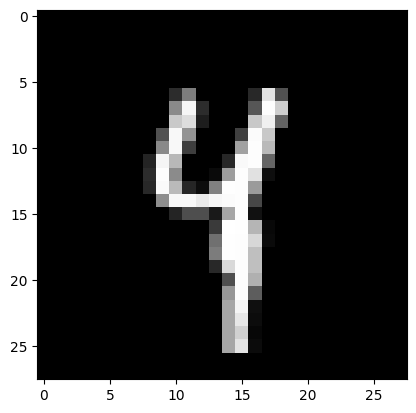

In [53]:
plt.imshow(train_data.data[1928], cmap= 'gray')
plt.show()

In [18]:
train_loader = DataLoader(train_data, batch_size= 32, shuffle= True)
test_loader = DataLoader(test_data, batch_size= 32, shuffle= False)

In [25]:
next(iter(train_loader))[0].shape

torch.Size([32, 1, 28, 28])

In [40]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

model = nn.Sequential(
    nn.Linear(28*28, 64),
    nn.ReLU(),
    nn.Linear(64, 64),
    nn.ReLU(),
    nn.Linear(64, 10)
)

model.to(device)
model

Sequential(
  (0): Linear(in_features=784, out_features=64, bias=True)
  (1): ReLU()
  (2): Linear(in_features=64, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
)

In [41]:
from tensorboardX import SummaryWriter
writer = SummaryWriter()

lr = 1e-3
criterion = nn.CrossEntropyLoss()       # 딥러닝에서 분류 모델에 사용되는 손실함수
optim = Adam(model.parameters(), lr= lr)
epochs = 20

step = 0

for epoch in range(epochs):
    for data, label in train_loader:
        optim.zero_grad()
        data = torch.reshape(data, (-1, 28*28))
        # data = data.view(-1, 28*28)
        pred = model(data.to(device))
        loss = criterion(pred, label.to(device))
        writer.add_scalar('loss/train', loss.item(), step)
        step = step + 1
        loss.backward()
        optim.step()

    print(f'epochs: {epoch+1} loss: {loss.item():.6f}')



epochs: 1 loss: 0.100534
epochs: 2 loss: 0.108891
epochs: 3 loss: 0.010819
epochs: 4 loss: 0.122998
epochs: 5 loss: 0.003989
epochs: 6 loss: 0.041452
epochs: 7 loss: 0.040393
epochs: 8 loss: 0.140316
epochs: 9 loss: 0.060268
epochs: 10 loss: 0.156814
epochs: 11 loss: 0.118132
epochs: 12 loss: 0.042796
epochs: 13 loss: 0.007304
epochs: 14 loss: 0.109003
epochs: 15 loss: 0.000301
epochs: 16 loss: 0.003735
epochs: 17 loss: 0.000777
epochs: 18 loss: 0.000423
epochs: 19 loss: 0.005981
epochs: 20 loss: 0.001997


In [49]:
model.eval()        # 학습용으로 쓰기 위해 가중치를 고정시키는 작업

with torch.no_grad():  
    total_corr = 0
    for images, labels in test_loader:
        # print(images.shape)
        images = images.view(-1, 28*28).to(device)
        labels = labels.to(device)

        preds = model(images)

        _, pred = torch.max(preds.data, 1)
        total_corr = total_corr + (pred == labels).sum().item()
                
    print(f'정확도: {total_corr/len(test_data.targets)}')

정확도: 0.9761
